In [1]:
import os

In [2]:
root_path = r"F:\KITTI"

lidar_path = r"F:\KITTI\2011_09_26\2011_09_26_drive_0009_extract\velodyne_points\data"

In [3]:
point_cloud_files = os.listdir(lidar_path)
print(len(point_cloud_files))

452


In [4]:
first_file = os.path.join(lidar_path, point_cloud_files[0])
first_file

'F:\\KITTI\\2011_09_26\\2011_09_26_drive_0009_extract\\velodyne_points\\data\\0000000000.txt'

In [5]:
# from mayavi import mlab
# mlab.init_notebook('x3d', 800, 450)
# s = mlab.test_plot3d()
# s

In [6]:
# mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

In [40]:
import matplotlib.pyplot as plt
import cv2
from kitti_lidar import KITTIObject, show_lidar_data, show_lidar_data_on_image
from IPython import display

In [26]:
from mayavi import mlab
mlab.init_notebook('ipy')
# mlab.init_notebook(backend='x3d')

Notebook initialized with ipy backend.


In [27]:
dataset = KITTIObject(r'F:\KITTI\data', 'training')

data_idx = 0

In [28]:
objects = dataset.get_label_objects(data_idx)

In [29]:
objects

In [30]:
pcd = dataset.get_lidar_data(data_idx)

In [31]:
pcd, pcd.shape

(array([[ 1.8324e+01,  4.9000e-02,  8.2900e-01,  0.0000e+00],
        [ 1.8344e+01,  1.0600e-01,  8.2900e-01,  0.0000e+00],
        [ 5.1299e+01,  5.0500e-01,  1.9440e+00,  0.0000e+00],
        ...,
        [ 3.7180e+00, -1.4060e+00, -1.7370e+00,  3.4000e-01],
        [ 3.7140e+00, -1.3910e+00, -1.7330e+00,  4.1000e-01],
        [ 3.9670e+00, -1.4740e+00, -1.8570e+00,  0.0000e+00]],
       dtype=float32),
 (115384, 4))

In [32]:
calib = dataset.get_calibration(data_idx)

In [33]:
calib

In [34]:
img = dataset.get_image(data_idx)

In [35]:
img.shape

(370, 1224, 3)

In [36]:
img_height, img_width, _ = img.shape

In [37]:
fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 500))

In [38]:
show_lidar_data(pcd, objects, calib, fig_3d, True, img_width, img_height)

In [39]:
fig_3d

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xf4\x08\x02\x00\x00\x00J"\xde/\x00\…

In [42]:
for idx in range(len(point_cloud_files)):
    objects = dataset.get_label_objects(idx)
#     print(objects)
    pcd = dataset.get_lidar_data(idx)
    calib = dataset.get_calibration(idx)
    img = dataset.get_image(idx)
    img_height, img_width, _ = img.shape
    fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 500))
    show_lidar_data(pcd, objects, calib, fig_3d, True, img_width, img_height)
    display.display(fig_3d)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xf4\x08\x02\x00\x00\x00J"\xde/\x00\…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xf4\x08\x02\x00\x00\x00J"\xde/\x00\…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xf4\x08\x02\x00\x00\x00J"\xde/\x00\…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xf4\x08\x02\x00\x00\x00J"\xde/\x00\…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xf4\x08\x02\x00\x00\x00J"\xde/\x00\…

TypeError: 'NoneType' object is not iterable

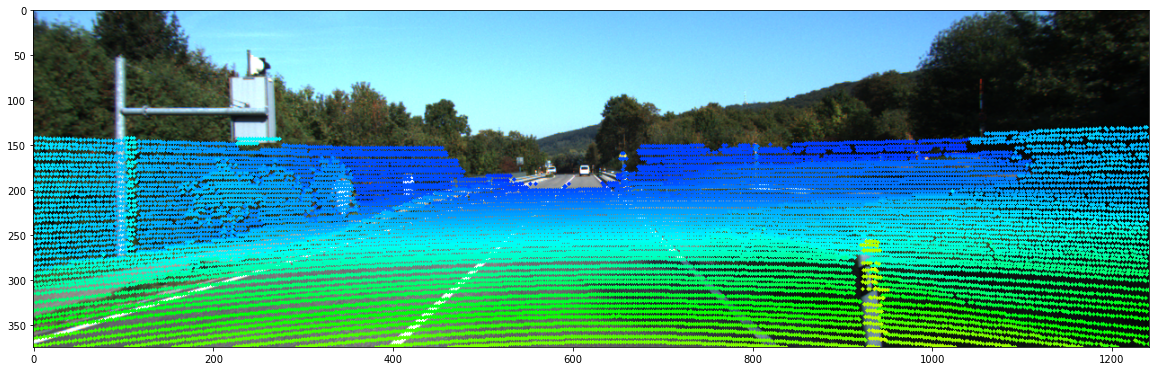

In [43]:
lidar_on_img = show_lidar_data_on_image(pcd[:, :3], img, calib, img_width, img_height)
lidar_on_img = cv2.cvtColor(lidar_on_img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(20, 20))
ax = fig.subplots()
ax.imshow(lidar_on_img)
plt.show()